c:\Users\jsjan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:34:22] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


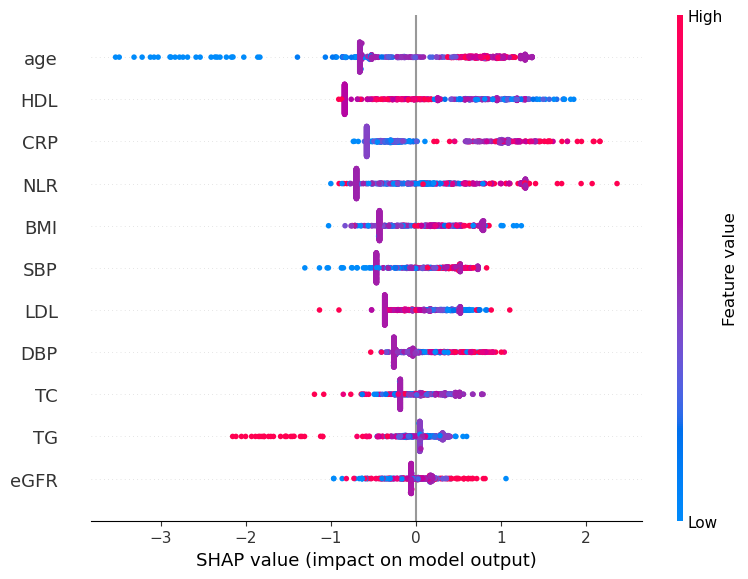

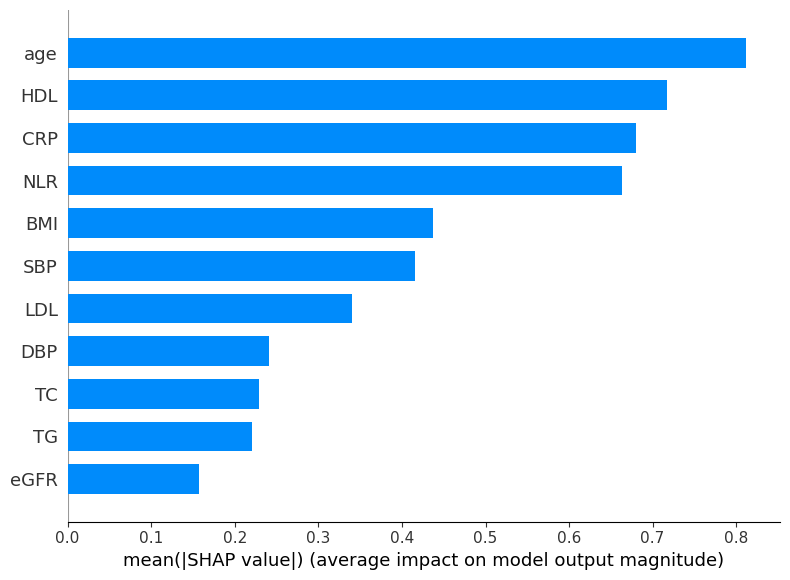

In [1]:
import pandas as pd
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_excel("CACS_dataset_with_binary.xlsx")

# 2. 입력 변수(X)와 타겟(y) 분리
drop_cols = ['id', 'name', 'birth', 'sex', 'CACS', 'CACS_binary']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['CACS_binary']

# 3. 결측치 처리
X = X.fillna(X.median(numeric_only=True))

# 4. 데이터 분할 및 정규화
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. XGBoost 모델 학습
model = xgb.XGBClassifier(n_estimators=100, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)

# 6. SHAP 값 계산 및 시각화
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# 7. SHAP 시각화
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")
